In [1]:
from tilepy.include.ObservationScheduler import getdate, GetUniversalSchedule
from tilepy.include.PointingTools import ObservationParameters, NextWindowTools
import time
import argparse
import os


/Users/hashkar/anaconda3/envs/tilepy/lib/python3.11/site-packages/ligo/lw/lsctables.py:89: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
/Users/hashkar/anaconda3/envs/tilepy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Type of followup, options: gbm, gbmpng or gw
alertType = 'gw'

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = '../dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
#cfgFile = '../obsConfig/FollowupParameters.ini'

# Galaxy catalog name (if no catalog is given, the approach will be 2D) only. Path is given in datasetDir 
galcatName = "converted_GLADE.h5"

# Tiles already observed
pointingsFile = None

# Limit on skyloc to perform a followup
locCut = None

Please choose one of the following maps, dates and obseratory arrays to launch the scheduler
# The url to the FITS file with the sky localization, e.g.for GW https://urlpath/Bayestar.fits.gz'
# Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
# Observatory array as a list

In [3]:
#GW follow-up: Multi-observatory campaign from the Northern and Southern hemisphere using the FoV-integrated 3-dimensional strategy
url = 'https://dcc.ligo.org/public/0119/P1500071/007/927563_lalinference.fits.gz'
obsTime = getdate("2023-06-15 10:30:10")
ObsArray = ['CTAN', 'CTAS']
parameters = []

In [14]:
#Very poorly localized Fermi-GBM GRB: Multi-telescope campaign at one site
url = 'https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2023/bn231012231/quicklook/glg_healpix_all_bn231012231.fit'
obsTime = getdate("2023-10-12 20:42:18")
ObsArray = ['LST1', 'LST2','LST3','LST4']
parameters = []

In [8]:
#IPN GRB follow-up: Single narrow FoV radio telescope in the Southern Hemisphere
url = 'https://www.ioffe.ru/LEA/ShortGRBs_IPN/data/20120612T59382/GRB20120612_T59382_IPN_map_hpx.fits.gz'
obsTime = getdate("2017-08-17 10:30:10")
ObsArray = ['ATCA']
parameters = []

In [22]:
#GW follow-up: Multi optical observatory campaign around the globe
url = 'https://gracedb.ligo.org/api/superevents/S190814bv/files/LALInference.v1.fits.gz'
obsTime = getdate("2023-09-15 01:30:10")
ObsArray = ['ESO', 'ESO2', 'LP','LPL', 'OHP', 'SA', 'HA']
parameters = []

In [4]:
# Config file for the tiling scheduling are in ../obsConfig/
for i in ObsArray:
    parameters.append("../obsConfig/FollowupParameters_%s.ini" % i)
print("===========================================================================================")
print('parameters', parameters)
obsparameters = []

parameters ['../obsConfig/FollowupParameters_CTAN.ini', '../obsConfig/FollowupParameters_CTAS.ini']


In [5]:
for j in range(len(parameters)):
    obspar = ObservationParameters()
    obspar.add_parsed_args(url, obsTime, datasetDir, galcatName, outDir, pointingsFile, alertType, locCut)
    obspar.from_configfile(parameters[j])
    obsparameters.append(obspar)

https://dcc.ligo.org/public/0119/P1500071/007/927563_lalinference.fits.gz
The filename is  927563_lalinference.fits.gz
curl https://dcc.ligo.org/public/0119/P1500071/007/927563_lalinference.fits.gz -o 927563_lalinference.fits.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  329k  100  329k    0     0   247k      0  0:00:01  0:00:01 --:--:--  247k


Is the hotspot in the galactic plane? False
Starting the 3D pointing calculation with the following parameters

Filename:  P1500071
Date:  2023-06-15 10:30:10
Catalog:  converted_GLADE.h5
Dataset:  ../dataset/
Output:  ./output/P1500071

obsparameters 2
No window found
No window found
Loading map from  927563_lalinference.fits.gz
Loading LVC HEALPix map from file: 927563_lalinference.fits.gz
Event has triggered  Non specified  => distance = 89.66  +- 19.29  Mpc
Loading galaxy catalogue from ../dataset/converted_GLADE.h5
Done loading galaxies
No pointings were given to be substracted
     dp_dV_FOV      
--------------------
0.012750454078576747
NOT passing the cut on dp_dV_FOV >  0.02
     dp_dV_FOV      
--------------------
0.017173816392689896
NOT passing the cut on dp_dV_FOV >  0.02
     dp_dV_FOV     
-------------------
0.01601310616871428
NOT passing the cut on dp_dV_FOV >  0.02
     dp_dV_FOV      
--------------------
0.017173816392689896
NOT passing the cut on dp_dV_FOV >  0.

/Users/hashkar/anaconda3/envs/tilepy/lib/python3.11/site-packages/tilepy/include/PointingPlotting.py:765: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle_patch = Circle((ra[i], dec[i]), fov, color=color1, facecolor="None", transform=ax_inset.get_transform('fk5'), alpha=1)


ValueError: setting an array element with a sequence.

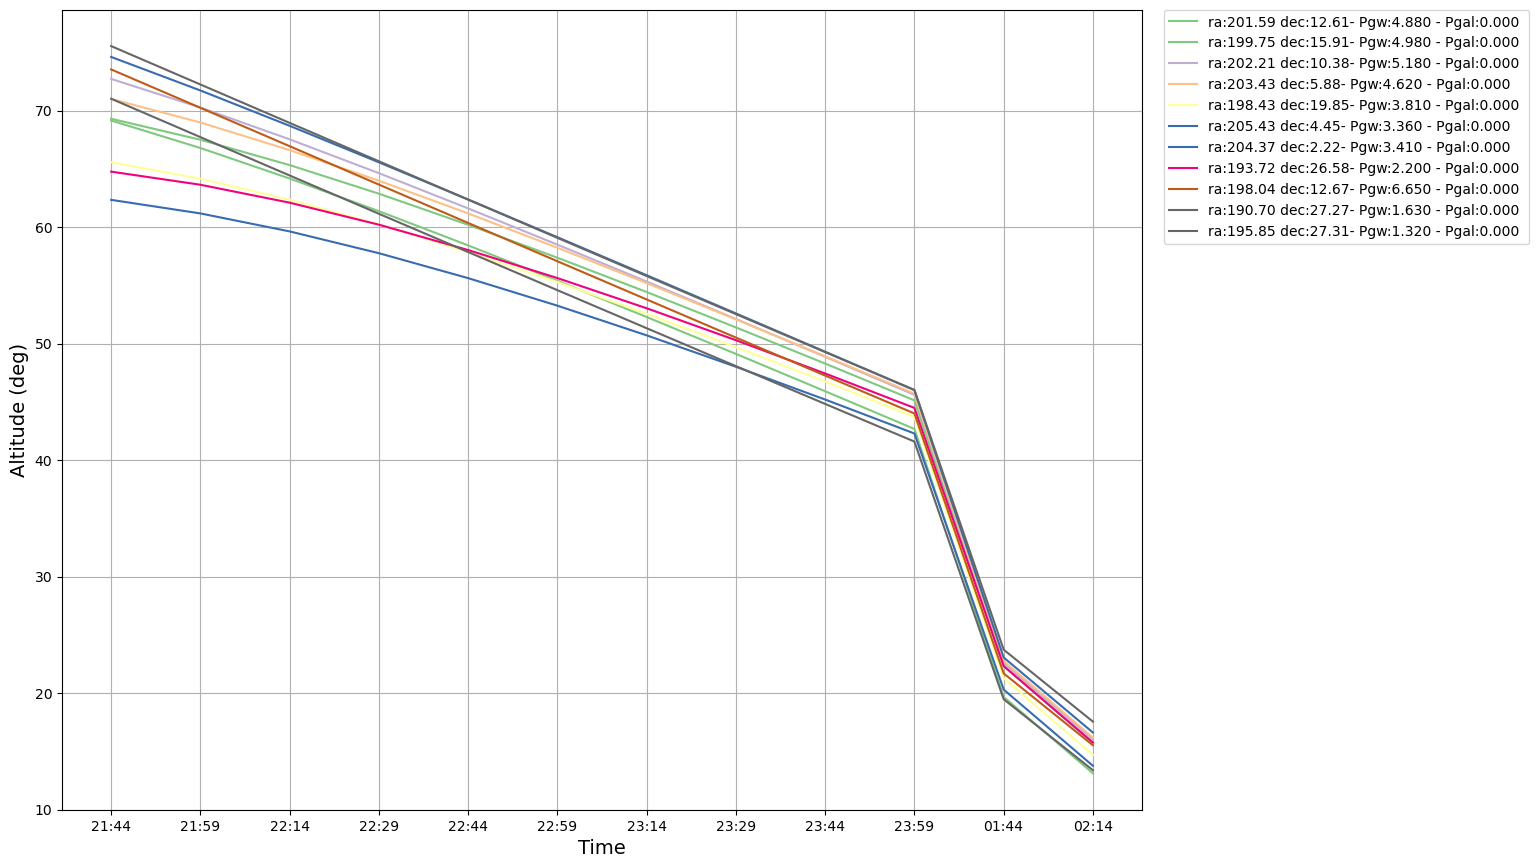

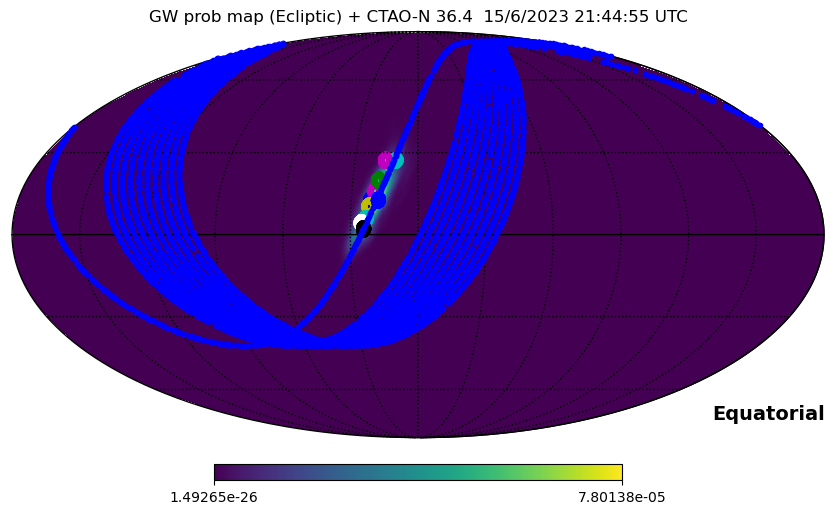

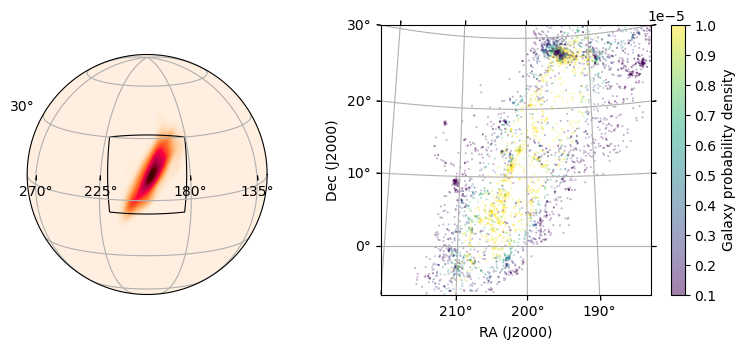

In [6]:
GetUniversalSchedule(obsparameters)